In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

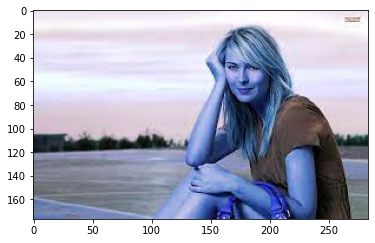

In [2]:
img=cv.imread('test/maria.jpeg')
plt.imshow(img)

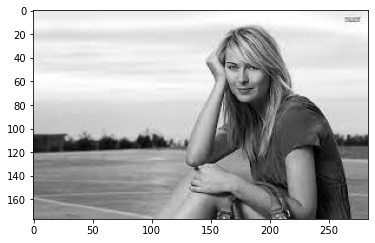

In [4]:
##contours are basically boundaries of objects/lines or curves joining the points along boundary
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

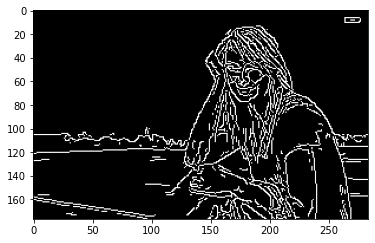

In [7]:
canny=cv.Canny(img,125,175)
plt.imshow(canny,cmap="gray")

In [8]:
##detecting contours

contours,hierarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE) ##RETR_LIST returns all contours
##RETR_EXTERNAL gives the eternal contours
##RETR_TREE return hierarchical contours
##hierarchies give the hierarchical representation of contours
##CHAIN_APPROX_NONE does nothing but returns all contours
##CHAIN_APPROX_SIMLPLE compresses the contours within a line and returns contours

##contours returns list of coordinates of all contours
print(len(contours))

230


In [9]:
contours2,hierarchies2=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(len(contours2))

230


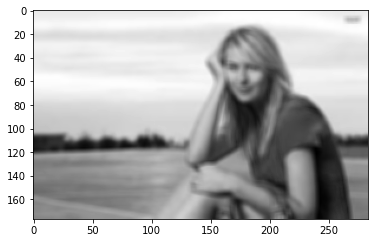

In [11]:
blur=cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT)
plt.imshow(blur,cmap="gray")

In [12]:
canny=cv.Canny(blur,125,175)
contours2,hierarchies2=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print(len(contours2)) ##blurring reduces contours

50


In [13]:
##Instead of edge detection we can use thresholding before contour detection

ret,thresh=cv.threshold(gray,125,255,cv.THRESH_BINARY) ##intensity below 125 is set to balck (0) and above 125 to white(255)

contours2,hierarchies2=cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print(len(contours2))

167


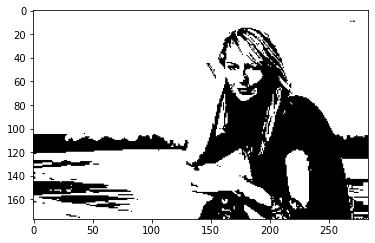

In [14]:
plt.imshow(thresh,cmap="gray")

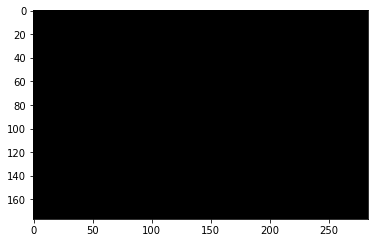

In [18]:
blank=np.zeros(img.shape,dtype="uint8")
plt.imshow(blank)

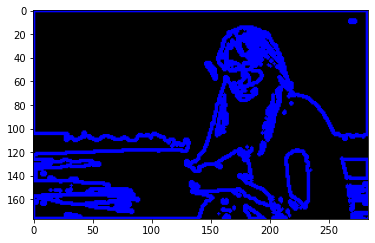

In [19]:
##lets draw contours over blank image to find what kind of contours opencv found
cv.drawContours(blank,contours2,-1,(0,0,255),2) ##-1 means draw all contours or we can specify number too
plt.imshow(blank)

##using thresholded image

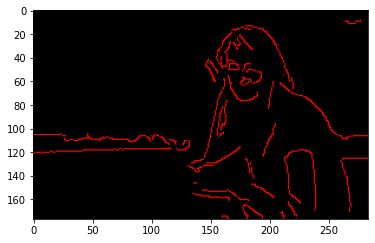

In [21]:
blank2=np.zeros(img.shape,dtype='uint8')
contours,hierarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
cv.drawContours(blank2,contours,-1,(255,0,0),1) ##-1 means draw all contours or we can specify number too
plt.imshow(blank2)

##using edge detection

230


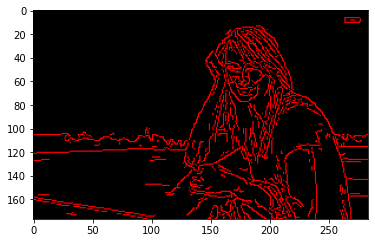

In [25]:
canny=cv.Canny(img,125,175)
blank3=np.zeros(img.shape,dtype='uint8')
contours,hierarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
cv.drawContours(blank3,contours,-1,(255,0,0),1) ##-1 means draw all contours or we can specify number too
plt.imshow(blank3)
print(len(contours))

##it is recommended to use canny first and then finding contours in that instead of thresholding